In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import importlib
import utils
import SA_optimize
import brute_optimize
from main_cd import main_cd as main
importlib.reload(utils)
importlib.reload(SA_optimize)
importlib.reload(brute_optimize)
from utils import *


In [7]:
vars = {
        'M': [1, 10],
        'qbits_per_channel': [3,50],
        'q_swap': [0., 1.],
        } 

vals = {
        'A': main.adjacency_tree(2,3),
        'protocol':'srs', 
        'p_cons': 0.1, 
        'p_gen': 0.9, 
        'p_swap':1,  
        'return_data':'avg', 
        'progress_bar': None,
        'cutoff': 2,
        'total_time': 10,
        'N_samples' : 10,
        }

s = Surrogate(main.simulation_cd,vals,vars,20)

MAXITER = 20
for iter in range(MAXITER):
    x_new, _ , opt = s.improvement()
    s.update(x_new, opt)
    print(iter/MAXITER)
    if iter > 10 and np.mean(list(map(abs,s.mean_improvement[-10:]))) < 1e-3:
        break

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [8]:
s_ref = Surrogate(main.simulation_cd,vals,vars,120)

Text(0.5, 0, 'Iteration')

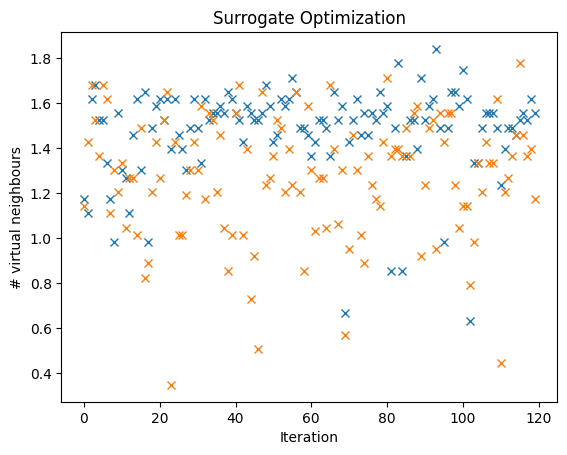

In [9]:
plt.title('Surrogate Optimization')
plt.plot([np.mean(y_i) for y_i in s.y], 'x', label='Surrogate optimization')
plt.plot([np.mean(y_i) for y_i in s_ref.y],'x', label='Random evaluations')
plt.ylabel('# virtual neighbours')
plt.xlabel('Iteration')

Text(0.5, 23.52222222222222, 'Iteration [1]')

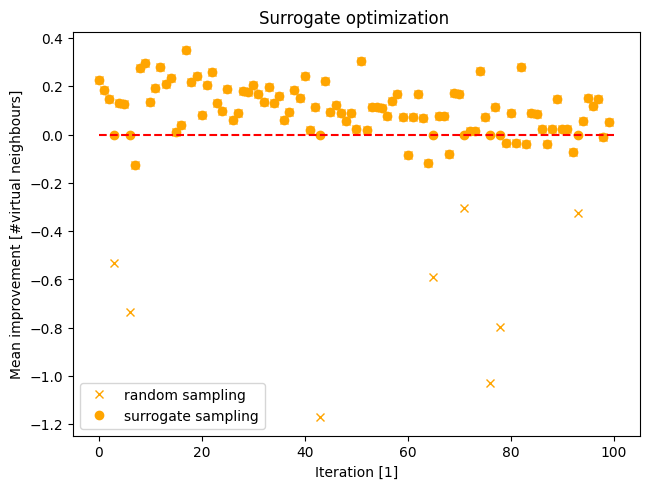

In [370]:
plt.title('Surrogate optimization ')
plt.plot(s.mean_improvement, 'x', label='random sampling', color='orange')
plt.plot(np.array(s.mean_improvement).T*np.array(s.opt_vec), 'o', label='surrogate sampling',color='orange')
plt.hlines(0,0,100,colors='red',linestyles='dashed')
plt.legend()
plt.tight_layout()
plt.ylabel('Mean improvement [#virtual neighbours]')
plt.xlabel('Iteration [1]')

In [386]:
s = Surrogate(main.simulation_cd,20,brute=1)
surrogate_optimize(s,100,verbose=True)

1.0 % done
2.0 % done
3.0 % done
4.0 % done
5.0 % done
6.0 % done
7.000000000000001 % done
8.0 % done
9.0 % done
10.0 % done
11.0 % done
12.0 % done
13.0 % done
14.000000000000002 % done
15.0 % done
16.0 % done
17.0 % done
18.0 % done
19.0 % done
20.0 % done
21.0 % done
22.0 % done
23.0 % done
24.0 % done
25.0 % done
26.0 % done
27.0 % done
28.000000000000004 % done
28.999999999999996 % done
30.0 % done
31.0 % done
32.0 % done
33.0 % done
34.0 % done
35.0 % done
36.0 % done
37.0 % done
38.0 % done
39.0 % done
40.0 % done
41.0 % done
42.0 % done
43.0 % done
44.0 % done
45.0 % done
46.0 % done
47.0 % done
48.0 % done
49.0 % done
50.0 % done
51.0 % done
52.0 % done
53.0 % done
54.0 % done
55.00000000000001 % done
56.00000000000001 % done
56.99999999999999 % done
57.99999999999999 % done
59.0 % done
60.0 % done
61.0 % done
62.0 % done
63.0 % done
64.0 % done
65.0 % done
66.0 % done
67.0 % done
68.0 % done
69.0 % done
70.0 % done
71.0 % done
72.0 % done
73.0 % done
74.0 % done
75.0 % done
7

In [387]:
r = Surrogate(main.simulation_cd,120)

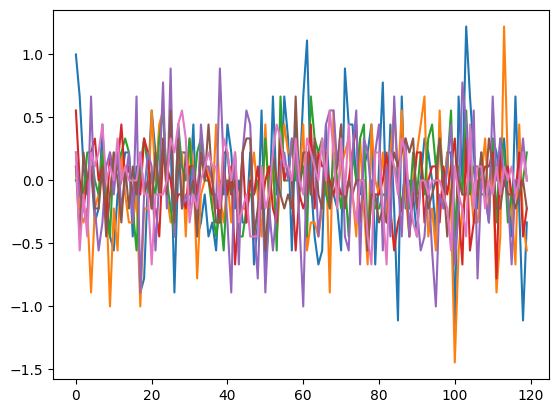

In [389]:
plt.plot(s.mmodel.predict(r.X_df.values)-r.y)

In [14]:
[input.to_dict() for input in s.X_df.iloc]

[{'M': 7.0, 'qbits_per_channel': 6.0, 'q_swap': 0.6510770255019445},
 {'M': 4.0, 'qbits_per_channel': 4.0, 'q_swap': 0.9149596755437808},
 {'M': 8.0, 'qbits_per_channel': 8.0, 'q_swap': 0.8500385777897993},
 {'M': 5.0, 'qbits_per_channel': 44.0, 'q_swap': 0.4494506741382034},
 {'M': 7.0, 'qbits_per_channel': 6.0, 'q_swap': 0.09541011649041131},
 {'M': 3.0, 'qbits_per_channel': 31.0, 'q_swap': 0.37081825219826636},
 {'M': 7.0, 'qbits_per_channel': 20.0, 'q_swap': 0.6688412526636073},
 {'M': 8.0, 'qbits_per_channel': 28.0, 'q_swap': 0.6659223566174967},
 {'M': 5.0, 'qbits_per_channel': 46.0, 'q_swap': 0.5912977877077271},
 {'M': 4.0, 'qbits_per_channel': 36.0, 'q_swap': 0.27472179299006416},
 {'M': 8.0, 'qbits_per_channel': 12.0, 'q_swap': 0.5612434258477011},
 {'M': 8.0, 'qbits_per_channel': 38.0, 'q_swap': 0.38292687475378984},
 {'M': 3.0, 'qbits_per_channel': 16.0, 'q_swap': 0.9717120953891037},
 {'M': 6.0, 'qbits_per_channel': 33.0, 'q_swap': 0.8489138242660839},
 {'M': 5.0, 'qbits_p

In [397]:
int(a[0])

1

In [3]:
import pickle

# Open the file in binary mode for reading
with open('2,3tree-iter10.pkl', 'rb') as file:
    # Load the object from the file
    loaded_data = pickle.load(file)

In [4]:
s = loaded_data[0]

In [5]:
s.optimize_time

25.630940437316895

In [24]:
a = {1:2, 3:4}
b = {2:7}

In [25]:
def test(a,b):
    c = {**a, **b}
    print(c)


In [26]:
test(a,b)

{1: 2, 3: 4, 2: 7}


In [27]:
a

{1: 2, 3: 4}

FIRST RESULTS - 28.09.2023

In [3]:
import pickle

with open('../surdata/square3_iter-500_objective-meanopt.pkl', 'rb') as file:
    # Load the object from the file
    loaded_data = pickle.load(file)

In [4]:
model, refmodel = loaded_data

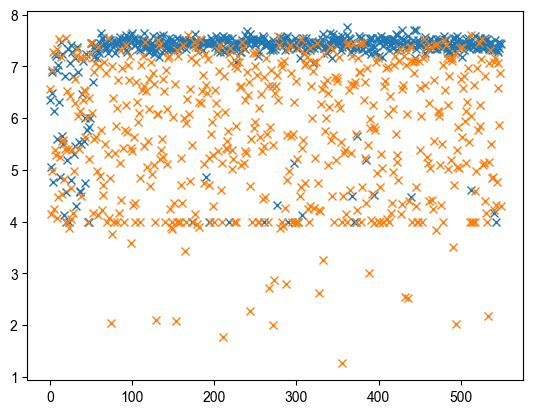

In [5]:
plt.plot([np.mean(y_i) for y_i in model.y], 'x')
plt.plot([np.mean(y_i) for y_i in refmodel.y], 'x')

In [66]:
import brute_optimize
importlib.reload(brute_optimize)
from brute_optimize import *
X_rand = get_candidates(model,1000000)
X_rand_df = pd.DataFrame(X_rand).astype(object)

In [67]:
y = model.mmodel.predict(X_rand_df.values)
start = time.time()
x,y = objective(model,X_rand_df)
print(time.time()-start)

2.8087921142578125


In [7]:
model.optimize_time/550

8.004405679702758